# Trabalho 1
** Vou escrever algo fofo aqui

## Parte 0 : Criação da função de plot para o programa
Para esta célula, será criada uma função que faz o plot de images. Essa função foi criada para evitar a repetição de código desnecessário

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def plot_img(img: np.ndarray, show_title: bool = False, title_msg: str = "") -> None:
    """
    Função que faz o plot de uma imagem

    :param img: np.ndarray que representa a imagem que será plotada
    :param show_title: booleana que indica se será criado um título para o plot da imagem
    :param title_msg: string que representa o título da imagem
    :return: None
    """
    plt.imshow(img, cmap="gray")
    if (show_title):
        plt.title(title_msg)
    plt.axis("off")
    plt.show()

Agora, vamos fazer um plot de teste para verificar que a função está funcionando


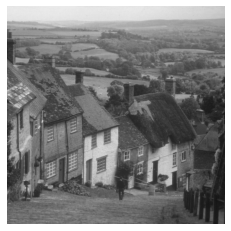

In [2]:
img_city = cv2.imread("Imagens/city.png")
plot_img(img_city)

## Parte 1 : Transformação de itensidade
A ideia desta parte é aplicar alguns métodos simples para alterar os valores de intensidade de uma imagem

### Transformação do negativo da imagem
A transformada de uma imagem pode ser dada da seguinte forma : Se pegarmos uma imagem em padrão _cinza_ ou _RGB_. A imagem invertida será

img_invertida[i, j] = $255 - x_{i, j}$

onde x é a imagem original e $0 <= x_{i, j} <= 255$ com $x_{i, j}$ sendo o valor de intensidade de um pixel nos índices $i, j$

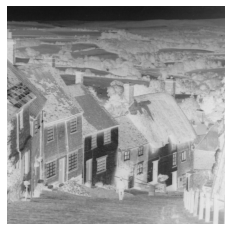

True

In [3]:
# fazendo o negativo da imagem
img_city_negative = 255 - img_city
plot_img(img_city_negative)
cv2.imwrite("ImagensResultado/imagem_negativa.png", img_city_negative)

### Imagem transformada em um intervalo
A ideia desta parte do projeto, é aplicar uma técnica de _nomarlização da imagem_, ou seja, iremos transformar todos os valores da imagem no intervalo [0, 1] e após isso, será aplicado outra transformação para o intervalo desejado. No nosso caso, esse intervalo será [100, 200]

Inicialmente, vamos verificar qual o intervalo da imagem atual

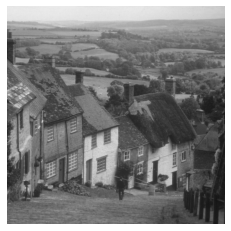

valor de pixel mínimo da imagem : 16
valor de pixel máximo da imagem : 235


In [4]:
plot_img(img_city)

print("valor de pixel mínimo da imagem : {}".format(img_city.min()))
print("valor de pixel máximo da imagem : {}".format(img_city.max()))

Agora, vamos aplicar a transformação e a mudança no intervalo desejado

valor de pixel mínimo da antes da transformação : 16
valor de pixel máximo da imagem transformada : 235


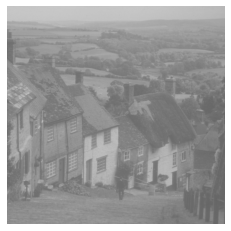

valor de pixel mínimo da imagem transformada : 100
valor de pixel máximo da imagem transformada : 200


In [5]:
img_transform = img_city.copy()

print("valor de pixel mínimo da antes da transformação : {}".format(img_transform.min()))
print("valor de pixel máximo da imagem transformada : {}".format(img_transform.max()))

# Normalizando a imagem o intervalo [0, 1]
img_transform = (img_transform - np.min(img_transform)) / np.ptp(img_transform)
new_range = (200 - 100)

# Normalizando a imagem no intervalo [100, 200] como np.uint8
img_transform = ((new_range * (img_transform - np.min(img_transform)) / np.ptp(img_transform)) + new_range).astype(
    np.uint8)

plot_img(img_transform)
cv2.imwrite("ImagensResultado/imagem_transformada.png", img_transform)

print("valor de pixel mínimo da imagem transformada : {}".format(img_transform.min()))
print("valor de pixel máximo da imagem transformada : {}".format(img_transform.max()))

### Inverter os valores de intensidade das linhas pares de uma matriz
Para esta parte, a abordagem utilizada será de fazer um _slicing_ nos índices pares da imagem e depois pegar os valores dos últimos elementos das
linhas e atribuir esses valores do fim da linha para o começo da linha

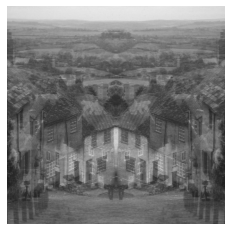

True

In [6]:
img_city_inverted_lines = img_city.copy()
img_city_inverted_lines[::2, :, :] = img_city_inverted_lines[::2, ::-1, :]

# Essa é uma outra alternativa de fazer a mesma operação
# img_city_inverted_lines[::2, :, :] = np.flip(img_city_inverted_lines[::2, :, :], axis=1)

plot_img(img_city_inverted_lines)
cv2.imwrite("ImagensResultado/linhas_pares_invertidas.png", img_city_inverted_lines)

### Operação de reflexão de linhas
A ideia desta operação é pegar todos os valores das colunas até a linha que é a metade do total das linhas da imagem. Por fins práticos, vamos supor que k é
um valor inteiro que representa o índice da metade das colunas.
Após isso, as linhas k + 1 da imagem original terão os seus valores de intensidade trocados com esse outro vetor.

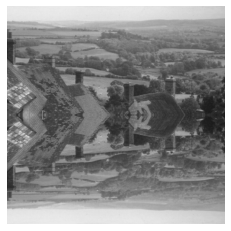

True

In [7]:
img_city_refleted_lines = img_city.copy()
n = img_city_refleted_lines.shape[0] // 2
half_img_city_refleted = img_city_refleted_lines[:n, :, :]
img_city_refleted_lines[n:, :, :] = half_img_city_refleted[::-1, ..., :]

# Outra alternativa seria usar o seguinte comando
# img_city_refleted_lines[n:, :, :] = np.flip(half_img_city_refleted, axis=0)

plot_img(img_city_refleted_lines)
cv2.imwrite("ImagensResultado/reflexao_de_linhas.png", img_city_refleted_lines)

### Espelhamento vertical
A ideia será aplicar um espelhamento vertical na imagem. Porém, utilizando todas as linhas da imagem para essa inversão

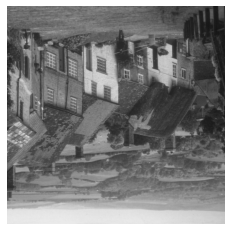

True

In [8]:
img_city_refleted_col = img_city.copy()
img_city_refleted_col = np.flipud(img_city_refleted_col)

plot_img(img_city_refleted_col)
cv2.imwrite("ImagensResultado/espelhamento_vertical.png", img_city_refleted_col)


## Parte 2 : Ajuste de Brilho
https://ashki23.github.io/markdown-latex.html#:~:text=We%20can%20use%20LaTeX%20to,a%20double%20%24%20to%20display%20equations.
Para esta parte do relatório, queremos alterar o brilho de uma imagem A monocromática da forma $B = A^{(1/\gamma)}$ onde $\gamma \in R$

In [9]:
def change_gamma_img(img: np.ndarray, gamma: float) -> np.ndarray:
    """
    Função que muda o contraste da imagem

    :param img: imagem de entrada
    :param gamma: valor float de gamma
    :return: retorna a imagem aplicada com o contraste modificado
    """
    b = (img - np.min(img)) / np.ptp(img)  # Alterando o espaço da imagem para o intervalo [0, 1]
    print("Valor mínimo de b após a conversão no intervalo [0, 1] : {}".format(b.min()))
    print("Valor máximo de b após a conversão no intervalo [0, 1] : {}".format(b.max()))
    b **= (1 / gamma)  # Aplicando a operação b = A^(1/gamma)
    return (255 * (b - np.min(b)) / np.ptp(b)).astype(
        np.uint8)  # Voltando para o intervalo [0, 255]

A ideia dessa função é :
(i) - Converter o intervalo de intensidade dos pixels no intervalo [0,255] para [0, 1].
(ii) - Aplicar a equação $B = A^{(1/\gamma)}$ na imagem normalizada.
(iii) - Com o resultado, pegar esses valores e voltar para o intervalo [0, 255]

Inicialmente, vamos ler a imagem de teste e verificar quais são os valores máximos e mínimos dela

In [10]:
babbo = cv2.imread("Imagens/baboon.png", 0)

valor de pixel mínimo da imagem binaria : 0
valor de pixel máximo da imagem binaria : 230


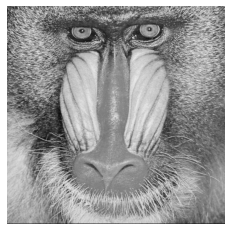

In [11]:
babbo_binary = babbo.copy()

print("valor de pixel mínimo da imagem binaria : {}".format(babbo_binary.min()))
print("valor de pixel máximo da imagem binaria : {}".format(babbo_binary.max()))

plot_img(babbo_binary)

### Aplicação para diferentes valores de $\gamma$

#### Aplicando a equação para $\gamma = 1.5$

Valor mínimo de b após a conversão no intervalo [0, 1] : 0.0
Valor máximo de b após a conversão no intervalo [0, 1] : 1.0
valor de pixel mínimo da imagem b : 0
valor de pixel máximo da imagem b : 255


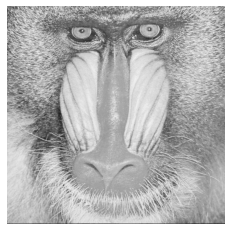

True

In [12]:
b = change_gamma_img(babbo, 1.5)

print("valor de pixel mínimo da imagem b : {}".format(b.min()))
print("valor de pixel máximo da imagem b : {}".format(b.max()))

plot_img(b)
cv2.imwrite("ImagensResultado/babbo_gama_1.png", b)

#### Aplicando a equação para $\gamma = 2.5$

Valor mínimo de b após a conversão no intervalo [0, 1] : 0.0
Valor máximo de b após a conversão no intervalo [0, 1] : 1.0
valor de pixel mínimo da imagem b : 0
valor de pixel máximo da imagem b : 255


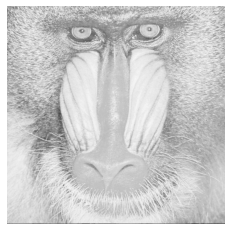

True

In [13]:
b = change_gamma_img(babbo, 2.5)

print("valor de pixel mínimo da imagem b : {}".format(b.min()))
print("valor de pixel máximo da imagem b : {}".format(b.max()))

plot_img(b)
cv2.imwrite("ImagensResultado/babbo_gama_2.png", b)

#### Aplicando a equação para $\gamma = 3.5$

Valor mínimo de b após a conversão no intervalo [0, 1] : 0.0
Valor máximo de b após a conversão no intervalo [0, 1] : 1.0
valor de pixel mínimo da imagem b : 0
valor de pixel máximo da imagem b : 255


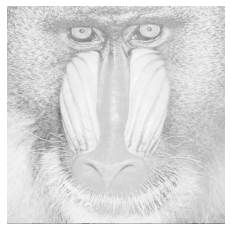

True

In [14]:
b = change_gamma_img(babbo, 3.5)

print("valor de pixel mínimo da imagem b : {}".format(b.min()))
print("valor de pixel máximo da imagem b : {}".format(b.max()))

plot_img(b)
cv2.imwrite("ImagensResultado/babbo_gama_3.png", b)

## Parte 3 : Plano de bits
Podemos escrever o plano de bits de uma imagem sendo um _polinômio de grau "m" na base "2"_. Dessa forma, podemos obter a seguinte fôrmula

$$p(m) = \sum_{i=1}^{m} 2^{i - 1}*a_{i - 1}$$

Dessa forma, o plano de bits de ordem $k - 1$ _será formado pelos coeficiente $a_{k - 1}$ do polinômio $2^{k - 1}$_. Com isso, vamos criar a função para calcular o bit plane do polinômio _k_ da forma

In [15]:
def bit_plane_k(img: np.ndarray, k: int) -> np.ndarray:
    """
    Função que realiza o bit plane de uma imagem

    :param img: image de entrada
    :param k: índice do plano de bit
    :return: retorna o slice do plano do bit
    """
    # Criando um plano de bit, que também é uma imagem. Onde cada elemento desse vetor será 2^k no plano k
    # Podemos pensar também que esse plano é uma máscara binária para filtar apenas esses valores de bits no plano 2^k
    plane = np.full((img.shape[0], img.shape[1]), 2 ** k, np.uint8)

    # Agora, será aplicado uma operação bitwise "and" para pegar esses valores
    res = cv2.bitwise_and(plane, img)

    # multiply ones (bit plane sliced) with 255 just for better visualization
    # Será multiplicado por 255 esses valores com o plano que queremos para visualizarmos essa imagem melhor
    res *= 255
    return res

#### Aplicando o plano de bit 0

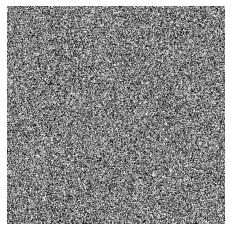

True

In [16]:
plot_img(bit_plane_k(babbo, 0))
cv2.imwrite("ImagensResultado/bit_plane_0.png", bit_plane_k(babbo, 0))

#### Aplicando o plano de bit 4

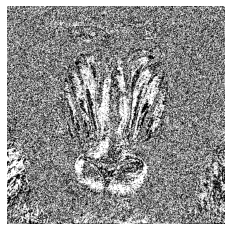

True

In [17]:
plot_img(bit_plane_k(babbo, 4))
cv2.imwrite("ImagensResultado/bit_plane_4.png", bit_plane_k(babbo, 4))

#### Aplicando o plano de bit 7

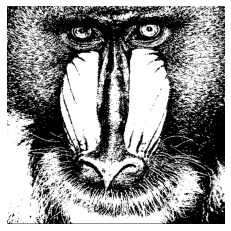

True

In [18]:
plot_img(bit_plane_k(babbo, 7))
cv2.imwrite("ImagensResultado/bit_plane_7.png", bit_plane_k(babbo, 7))

## Parte 4 : Criação de um mosaico em uma imagem
Para esta parte, queremos criar um grid 4x4 de tal forma que possamos trocar a disposição destes grids maiores. Para isso, inicialmente precisamos saber quantos pixels serão para cada quadrado.
Sabendo que a imagem do baboo tem dimensão 512x512. Podemos somar a quantidade total de cada pixel na imagem. Dessa forma, temos a seguinte conta :

$$16*x^{2} = 512*512 \implies x^{2} = 16384$ \implies x = 128$$

Dessa forma, teremos _cada grid com dimensão 128x128_

### Criação de funções úteis
Além disso, será criado algumas funções para facilitar no código

In [19]:
def get_block_from_img(img: np.ndarray, start_index_row: int, end_index_row: int, start_index_col: int,
                       end_index_col: int) -> np.ndarray:
    """
    Função que pega um block da imagem a partir dos índices iniciais e finais das linhas e colunas

    :param img: imagem para o grid
    :param start_index_row: índice inicial da linha para pegar no grid
    :param end_index_row: índice da linha final de parada do grid
    :param start_index_col: índicie inicial da coluna para pegar no grid
    :param end_index_col: índice da coluna final de parada do grid
    :return: retorna o bloco desejado usando esses índices
    """
    return img[start_index_row: end_index_row, start_index_col: end_index_col]

In [20]:
def change_block(img: np.ndarray, block_img: np.ndarray, interval_block: tuple[int, int, int, int]) -> None:
    """
    Função que troca blocos da imagem

    :param img: imagem de entrada
    :param block_img: bloco da imagem que será substituido
    :param interval_block: intervalo em que este bloco será aplicado
    :return: None
    """
    img[interval_block[0]: interval_block[1],
    interval_block[2]:interval_block[3]] = block_img

### Ideia do algorítmo
A ideia é bem simples. Após definidos todos os blocos da imagem. Será aplicado a função _change_block_ na disposição que o exercício propós

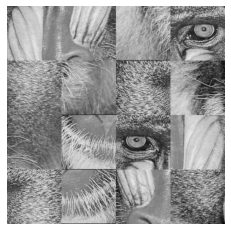

True

In [21]:
babbo_copy = babbo.copy()

# criando os valores do grid da imagem

# Primeira linha
block_1 = get_block_from_img(babbo, 0, 128, 0, 128)
block_2 = get_block_from_img(babbo, 0, 128, 128, 256)
block_3 = get_block_from_img(babbo, 0, 128, 256, 384)
block_4 = get_block_from_img(babbo, 0, 128, 384, 512)

# Segunda linha
block_5 = get_block_from_img(babbo, 128, 256, 0, 128)
block_6 = get_block_from_img(babbo, 128, 256, 128, 256)
block_7 = get_block_from_img(babbo, 128, 256, 256, 384)
block_8 = get_block_from_img(babbo, 128, 256, 384, 512)

# Terceira linha
block_9 = get_block_from_img(babbo, 256, 384, 0, 128)
block_10 = get_block_from_img(babbo, 256, 384, 128, 256)
block_11 = get_block_from_img(babbo, 256, 384, 256, 384)
block_12 = get_block_from_img(babbo, 256, 384, 384, 512)

# Quarta linha
block_13 = get_block_from_img(babbo, 384, 512, 0, 128)
block_14 = get_block_from_img(babbo, 384, 512, 128, 256)
block_15 = get_block_from_img(babbo, 384, 512, 256, 384)
block_16 = get_block_from_img(babbo, 384, 512, 384, 512)

#########################################################

# Trocando os valores das linhas

# Troca da primeira linha
change_block(babbo_copy, block_6, (0, 128, 0, 128))
change_block(babbo_copy, block_11, (0, 128, 128, 256))
change_block(babbo_copy, block_13, (0, 128, 256, 384))
change_block(babbo_copy, block_3, (0, 128, 384, 512))

# Troca da segunda linha
change_block(babbo_copy, block_8, (128, 256, 0, 128))
change_block(babbo_copy, block_16, (128, 256, 128, 256))
change_block(babbo_copy, block_1, (128, 256, 256, 384))
change_block(babbo_copy, block_9, (128, 256, 384, 512))

# Troca da terceira linha
change_block(babbo_copy, block_12, (256, 384, 0, 128))
change_block(babbo_copy, block_14, (256, 384, 128, 256))
change_block(babbo_copy, block_2, (256, 384, 256, 384))
change_block(babbo_copy, block_7, (256, 384, 384, 512))

# Troca da quarta linha
change_block(babbo_copy, block_4, (384, 512, 0, 128))
change_block(babbo_copy, block_15, (384, 512, 128, 256))
change_block(babbo_copy, block_10, (384, 512, 256, 384))
change_block(babbo_copy, block_5, (384, 512, 384, 512))
#########################################################

plot_img(babbo_copy)
cv2.imwrite("ImagensResultado/mosaico_baboo.png", babbo_copy)

## Parte 5 : Combinação de imagens
Para esta parte, queremos somar as imagems usando a média ponderada dos valores da imagem. Desta forma, este trabalho utilizará como base a função [addWeighted](https://docs.opencv.org/4.x/d2/de8/group__core__array.html#gafafb2513349db3bcff51f54ee5592a19) do _opencv_.

Em particular, utilizando a [equação da média ponderada](https://docs.opencv.org/4.x/d0/d86/tutorial_py_image_arithmetics.html), temos que
$$res = \alpha * I_{1} + \beta * I_{2} + \gamma$$
onde $\alpha, \beta, \gamma \in R$, $I_{1}, I_{2} \in R^{nxm}$.

De forma mais prática, os valores de $alpha$ e $\beta$ são as médias ponderadas e $\gamma$ é o valor do contraste. Em nossa aplicação, iremos considerar que $\gamma = 0$, restando apenas que

$$res = \alpha * I_{1} + \beta * I_{2}$$

na qual será a equação utilizada nesse exercício

OBS : Nesses exercícios, iremos considerar que $I_{1}$ é a imagem do _baboo_ e $I_{2}$ a imagem da _butterfly_

Além disso, para resolvermos a questão, poderiamos fazer também que $z = (\alpha * I_{1} + \beta * I_{2})$_.astype(np.uint8)_

### Para $\alpha = 0.2$ e $\beta = 0.8$

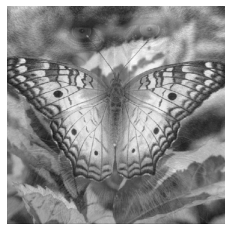

True

In [22]:
butterfly = cv2.imread("Imagens/butterfly.png", 0)
z = cv2.addWeighted(babbo, 0.2, butterfly, 0.8, 0).astype(np.uint8)
plot_img(z)
cv2.imwrite("ImagensResultado/primeira_soma.png", z)

### Para $\alpha = 0.5$ e $\beta = 0.5$

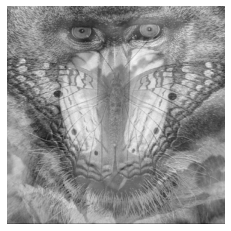

True

In [23]:
z = cv2.addWeighted(babbo, 0.5, butterfly, 0.5, 0).astype(np.uint8)
plot_img(z)
cv2.imwrite("ImagensResultado/segunda_soma.png", z)

### Para $\alpha = 0.8$ e $\beta = 0.2$

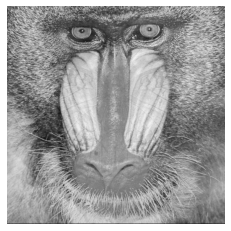

True

In [24]:
z = cv2.addWeighted(babbo, 0.8, butterfly, 0.2, 0).astype(np.uint8)
plot_img(z)
cv2.imwrite("ImagensResultado/terceira_soma.png", z)